# Major Project: "Heart Disease Prediction from Framingham Dataset"

### Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from google.colab import drive
drive.mount("/content/gdrive")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Mounted at /content/gdrive


Here we downloaded all the libraries required for our machine learning Project "Framingham Heart Disease Prediction Model"

Here we load the dataset given to us in the form of a dataframe in Pandas and further rename the columns and show the top 10 observations from the sample 

In [2]:
df = pd.read_csv("/content/gdrive/My Drive/framingham.csv", na_values='?',header=None)
df.columns= ['Gender (Male)','Age','Education','Current Smoker','Cigs/Day','BP Meds','Prevalent Stroke','Prevalent Hypertension','Diabetes', 'Total Cholesterol', 'Systolic BP',
            'Diastolic BP', 'BMI', 'Heart Rate', 'Glucose','Ten Year CHD']
df.drop(df.index[0], inplace = True)
df.head(10)

,Gender (Male),Age,Education,Current Smoker,Cigs/Day,BP Meds,Prevalent Stroke,Prevalent Hypertension,Diabetes,Total Cholesterol,Systolic BP,Diastolic BP,BMI,Heart Rate,Glucose,Ten Year CHD
1,1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77,0
2,0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76,0
3,1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
4,0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103,1
5,0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85,0
6,0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99,0
7,0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85,1
8,0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78,0
9,1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79,0
10,1,43,1,1,30,0,0,1,0,225,162,107,23.61,93,88,0


Every Data has number of empty values. Hence, we are finding out all the NaN values in the dataset

In [3]:
df.isnull().sum()

Gender (Male)               0
Age                         0
Education                 105
Current Smoker              0
Cigs/Day                   29
BP Meds                    53
Prevalent Stroke            0
Prevalent Hypertension      0
Diabetes                    0
Total Cholesterol          50
Systolic BP                 0
Diastolic BP                0
BMI                        19
Heart Rate                  1
Glucose                   388
Ten Year CHD                0
dtype: int64

Here we check the shape of our dataframe which is currently 4240 rows by 16 columns

In [4]:
df.shape

(4240, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 1 to 4240
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender (Male)           4240 non-null   object
 1   Age                     4240 non-null   object
 2   Education               4135 non-null   object
 3   Current Smoker          4240 non-null   object
 4   Cigs/Day                4211 non-null   object
 5   BP Meds                 4187 non-null   object
 6   Prevalent Stroke        4240 non-null   object
 7   Prevalent Hypertension  4240 non-null   object
 8   Diabetes                4240 non-null   object
 9   Total Cholesterol       4190 non-null   object
 10  Systolic BP             4240 non-null   object
 11  Diastolic BP            4240 non-null   object
 12  BMI                     4221 non-null   object
 13  Heart Rate              4239 non-null   object
 14  Glucose                 3852 non-null   object
 15  Ten 


Since the datatype of all the data in the dataframe is of objet type, it is impossible to carry out mathematical/numerical operations on the data. Due to which we convert the datatype to their respective forms like int and float.


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 1 to 4240
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender (Male)           4240 non-null   int64  
 1   Age                     4240 non-null   int64  
 2   Education               4135 non-null   float64
 3   Current Smoker          4240 non-null   int64  
 4   Cigs/Day                4211 non-null   float64
 5   BP Meds                 4187 non-null   float64
 6   Prevalent Stroke        4240 non-null   int64  
 7   Prevalent Hypertension  4240 non-null   int64  
 8   Diabetes                4240 non-null   int64  
 9   Total Cholesterol       4190 non-null   float64
 10  Systolic BP             4240 non-null   float64
 11  Diastolic BP            4240 non-null   float64
 12  BMI                     4221 non-null   float64
 13  Heart Rate              4239 non-null   float64
 14  Glucose                 3852 non-null   

Here we are cuurently looking at the overall crux of our dataframe of the dataset and getting an overall insight about the data we are supposed to work on.

In [8]:
df.describe()

,Gender (Male),Age,Education,Current Smoker,Cigs/Day,BP Meds,Prevalent Stroke,Prevalent Hypertension,Diabetes,Total Cholesterol,Systolic BP,Diastolic BP,BMI,Heart Rate,Glucose,Ten Year CHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('Since the number of rows with missing values are only',round((count/len(df.index))*100), '% of the entire dataset given, we decide to drop the rows with the missing or NaN values.')

Total number of rows with missing values is  582
Since the number of rows with missing values are only 14 % of the entire dataset given, we decide to drop the rows with the missing or NaN values.


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Gender (Male)             0
Age                       0
Education                 0
Current Smoker            0
Cigs/Day                  0
BP Meds                   0
Prevalent Stroke          0
Prevalent Hypertension    0
Diabetes                  0
Total Cholesterol         0
Systolic BP               0
Diastolic BP              0
BMI                       0
Heart Rate                0
Glucose                   0
Ten Year CHD              0
dtype: int64

In [12]:
df.shape

(3658, 16)

In [13]:
df.mean()

Gender (Male)               0.443685
Age                        49.551941
Education                   1.980317
Current Smoker              0.489065
Cigs/Day                    9.025424
BP Meds                     0.030344
Prevalent Stroke            0.005741
Prevalent Hypertension      0.311646
Diabetes                    0.027064
Total Cholesterol         236.847731
Systolic BP               132.370558
Diastolic BP               82.917031
BMI                        25.782802
Heart Rate                 75.730727
Glucose                    81.852925
Ten Year CHD                0.152269
dtype: float64

Lets look at the column Cigs/Day and here we observe that their are two outliers in the data and the outliers have to be removed in order to get accurate results.

# Before:

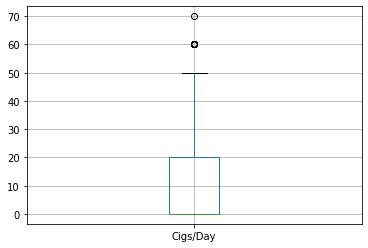

In [14]:
df.boxplot(column='Cigs/Day')

In [15]:
df.loc[df['Cigs/Day'] > 59, 'Cigs/Day'] = 9.02

# After removing the outliers:

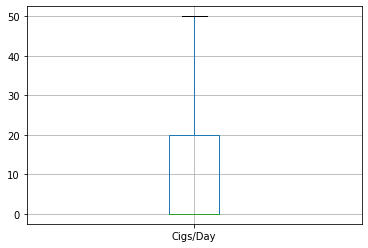

In [16]:
df.boxplot(column='Cigs/Day')

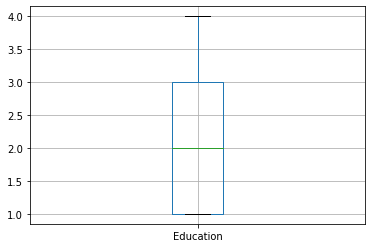

In [17]:
df.boxplot(column='Education')

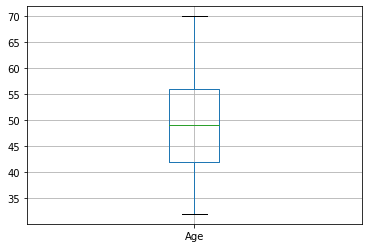

In [18]:
df.boxplot(column='Age')

In [19]:
df["Age"].describe()

count    3658.000000
mean       49.551941
std         8.562029
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: Age, dtype: float64

Lets look at the column Total Cholesterol and here we observe that their are two outliers in the data and the outliers have to be removed in order to get accurate results.

# Before:

In [20]:
df['Total Cholesterol'].describe()

count    3658.000000
mean      236.847731
std        44.097681
min       113.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       600.000000
Name: Total Cholesterol, dtype: float64

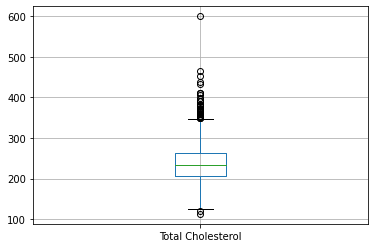

In [21]:
df.boxplot(column='Total Cholesterol')

In [22]:
df.loc[df['Total Cholesterol'] > 480, 'Total Cholesterol'] = 237

# After removing the outliers:

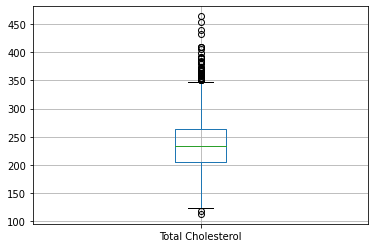

In [23]:
df.boxplot(column='Total Cholesterol')

In [24]:
df['Total Cholesterol'].describe()

count    3658.000000
mean      236.748496
std        43.686765
min       113.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       464.000000
Name: Total Cholesterol, dtype: float64

Lets look at the column Systolic BP and here we observe that their is one outlier in the data and the outliers have to be removed in order to get accurate results.

# Before:

In [25]:
df['Systolic BP'].describe()

count    3658.000000
mean      132.370558
std        22.086866
min        83.500000
25%       117.000000
50%       128.000000
75%       143.875000
max       295.000000
Name: Systolic BP, dtype: float64

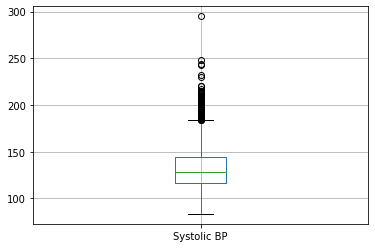

In [26]:
df.boxplot(column='Systolic BP')

In [27]:
df.loc[df['Systolic BP'] > 270, 'Systolic BP'] = df['Systolic BP'].median()

# After removing the outliers:

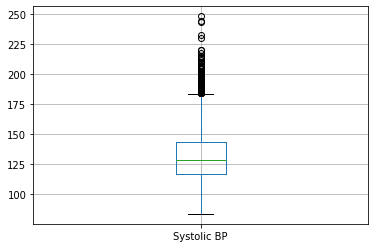

In [28]:
df.boxplot(column='Systolic BP')

In [29]:
df['Systolic BP'].describe()

count    3658.000000
mean      132.324904
std        21.922603
min        83.500000
25%       117.000000
50%       128.000000
75%       143.500000
max       248.000000
Name: Systolic BP, dtype: float64

In [30]:
df['Diastolic BP'].describe()

count    3658.000000
mean       82.917031
std        11.974258
min        48.000000
25%        75.000000
50%        82.000000
75%        90.000000
max       142.500000
Name: Diastolic BP, dtype: float64

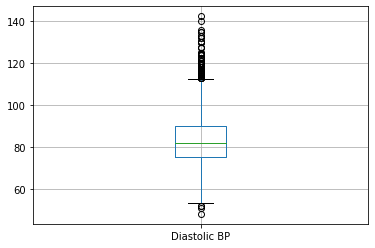

In [31]:
df.boxplot(column='Diastolic BP')

Lets look at the column BMI and here we observe that their are two outliers in the data and the outliers have to be removed in order to get accurate results.

# Before:

In [32]:
df['BMI'].describe()

count    3658.000000
mean       25.782802
std         4.065601
min        15.540000
25%        23.080000
50%        25.380000
75%        28.037500
max        56.800000
Name: BMI, dtype: float64

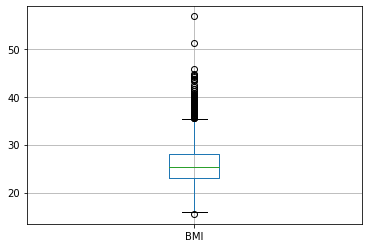

In [33]:
df.boxplot(column='BMI')

In [34]:
df.loc[df['BMI'] > 49, 'BMI'] = df['BMI'].median()

# After removing the outliers:

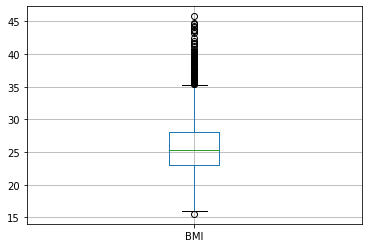

In [35]:
df.boxplot(column='BMI')

In [36]:
df['BMI'].describe()

count    3658.000000
mean       25.767132
std         4.010998
min        15.540000
25%        23.080000
50%        25.380000
75%        28.015000
max        45.800000
Name: BMI, dtype: float64

In [37]:
df['Heart Rate'].describe()

count    3658.000000
mean       75.730727
std        11.981525
min        44.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       143.000000
Name: Heart Rate, dtype: float64

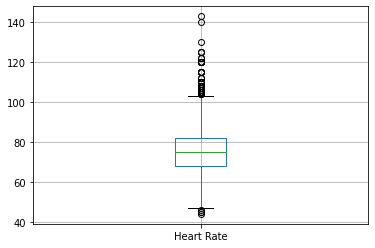

In [38]:
df.boxplot(column='Heart Rate')

In [39]:
df['Glucose'].describe()

count    3658.000000
mean       81.852925
std        23.904164
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: Glucose, dtype: float64

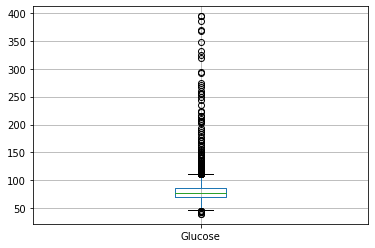

In [40]:
df.boxplot(column='Glucose')

Above we observed that the Glucose level and Heart Rate have not been changed although their boxplots show some outliers, i.e., becuase these levels differ variedly from person to person and can be too high or too low depending upon the person's health.

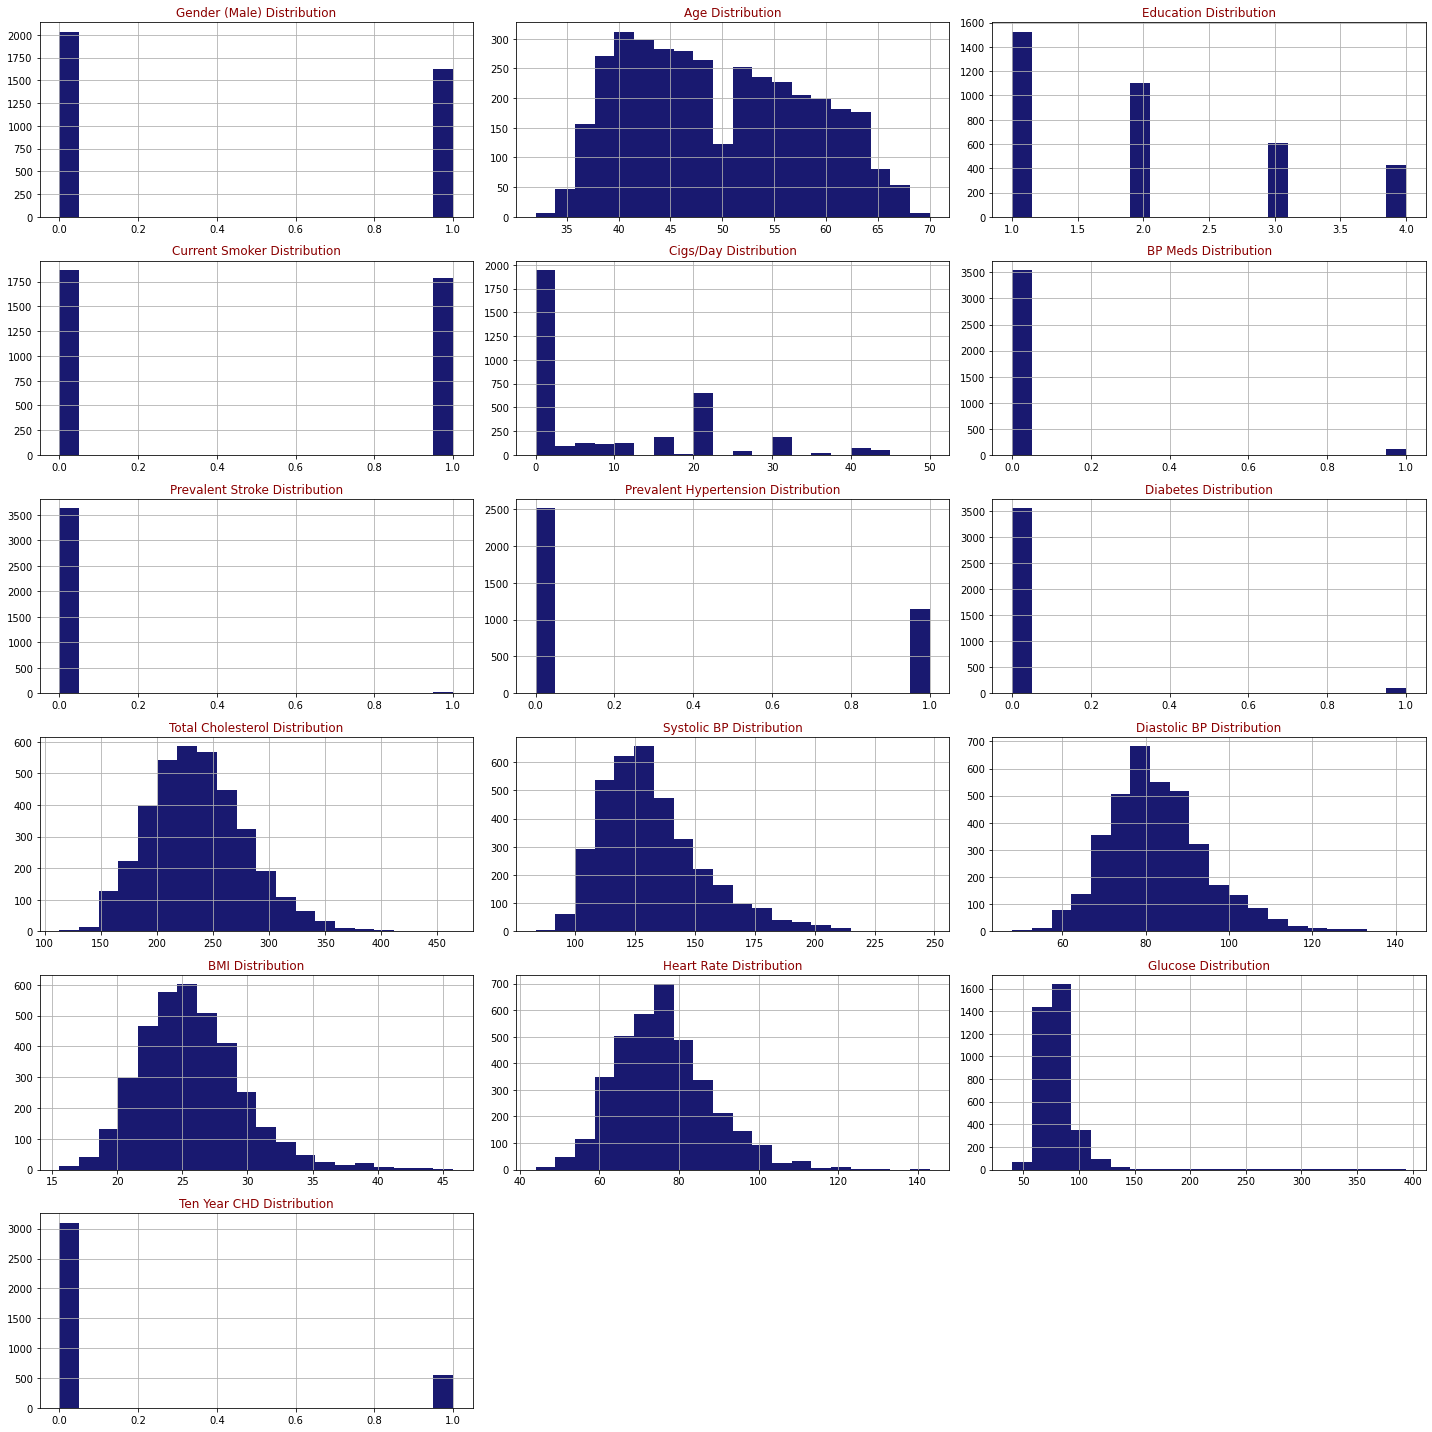

In [41]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

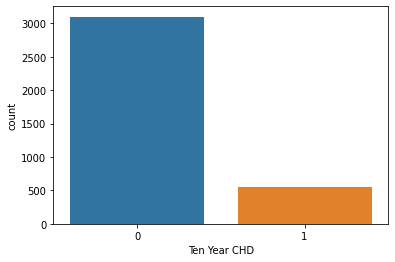

In [42]:
sn.countplot(x='Ten Year CHD',data=df)


In [43]:
df["Ten Year CHD"].value_counts()


0    3101
1     557
Name: Ten Year CHD, dtype: int64

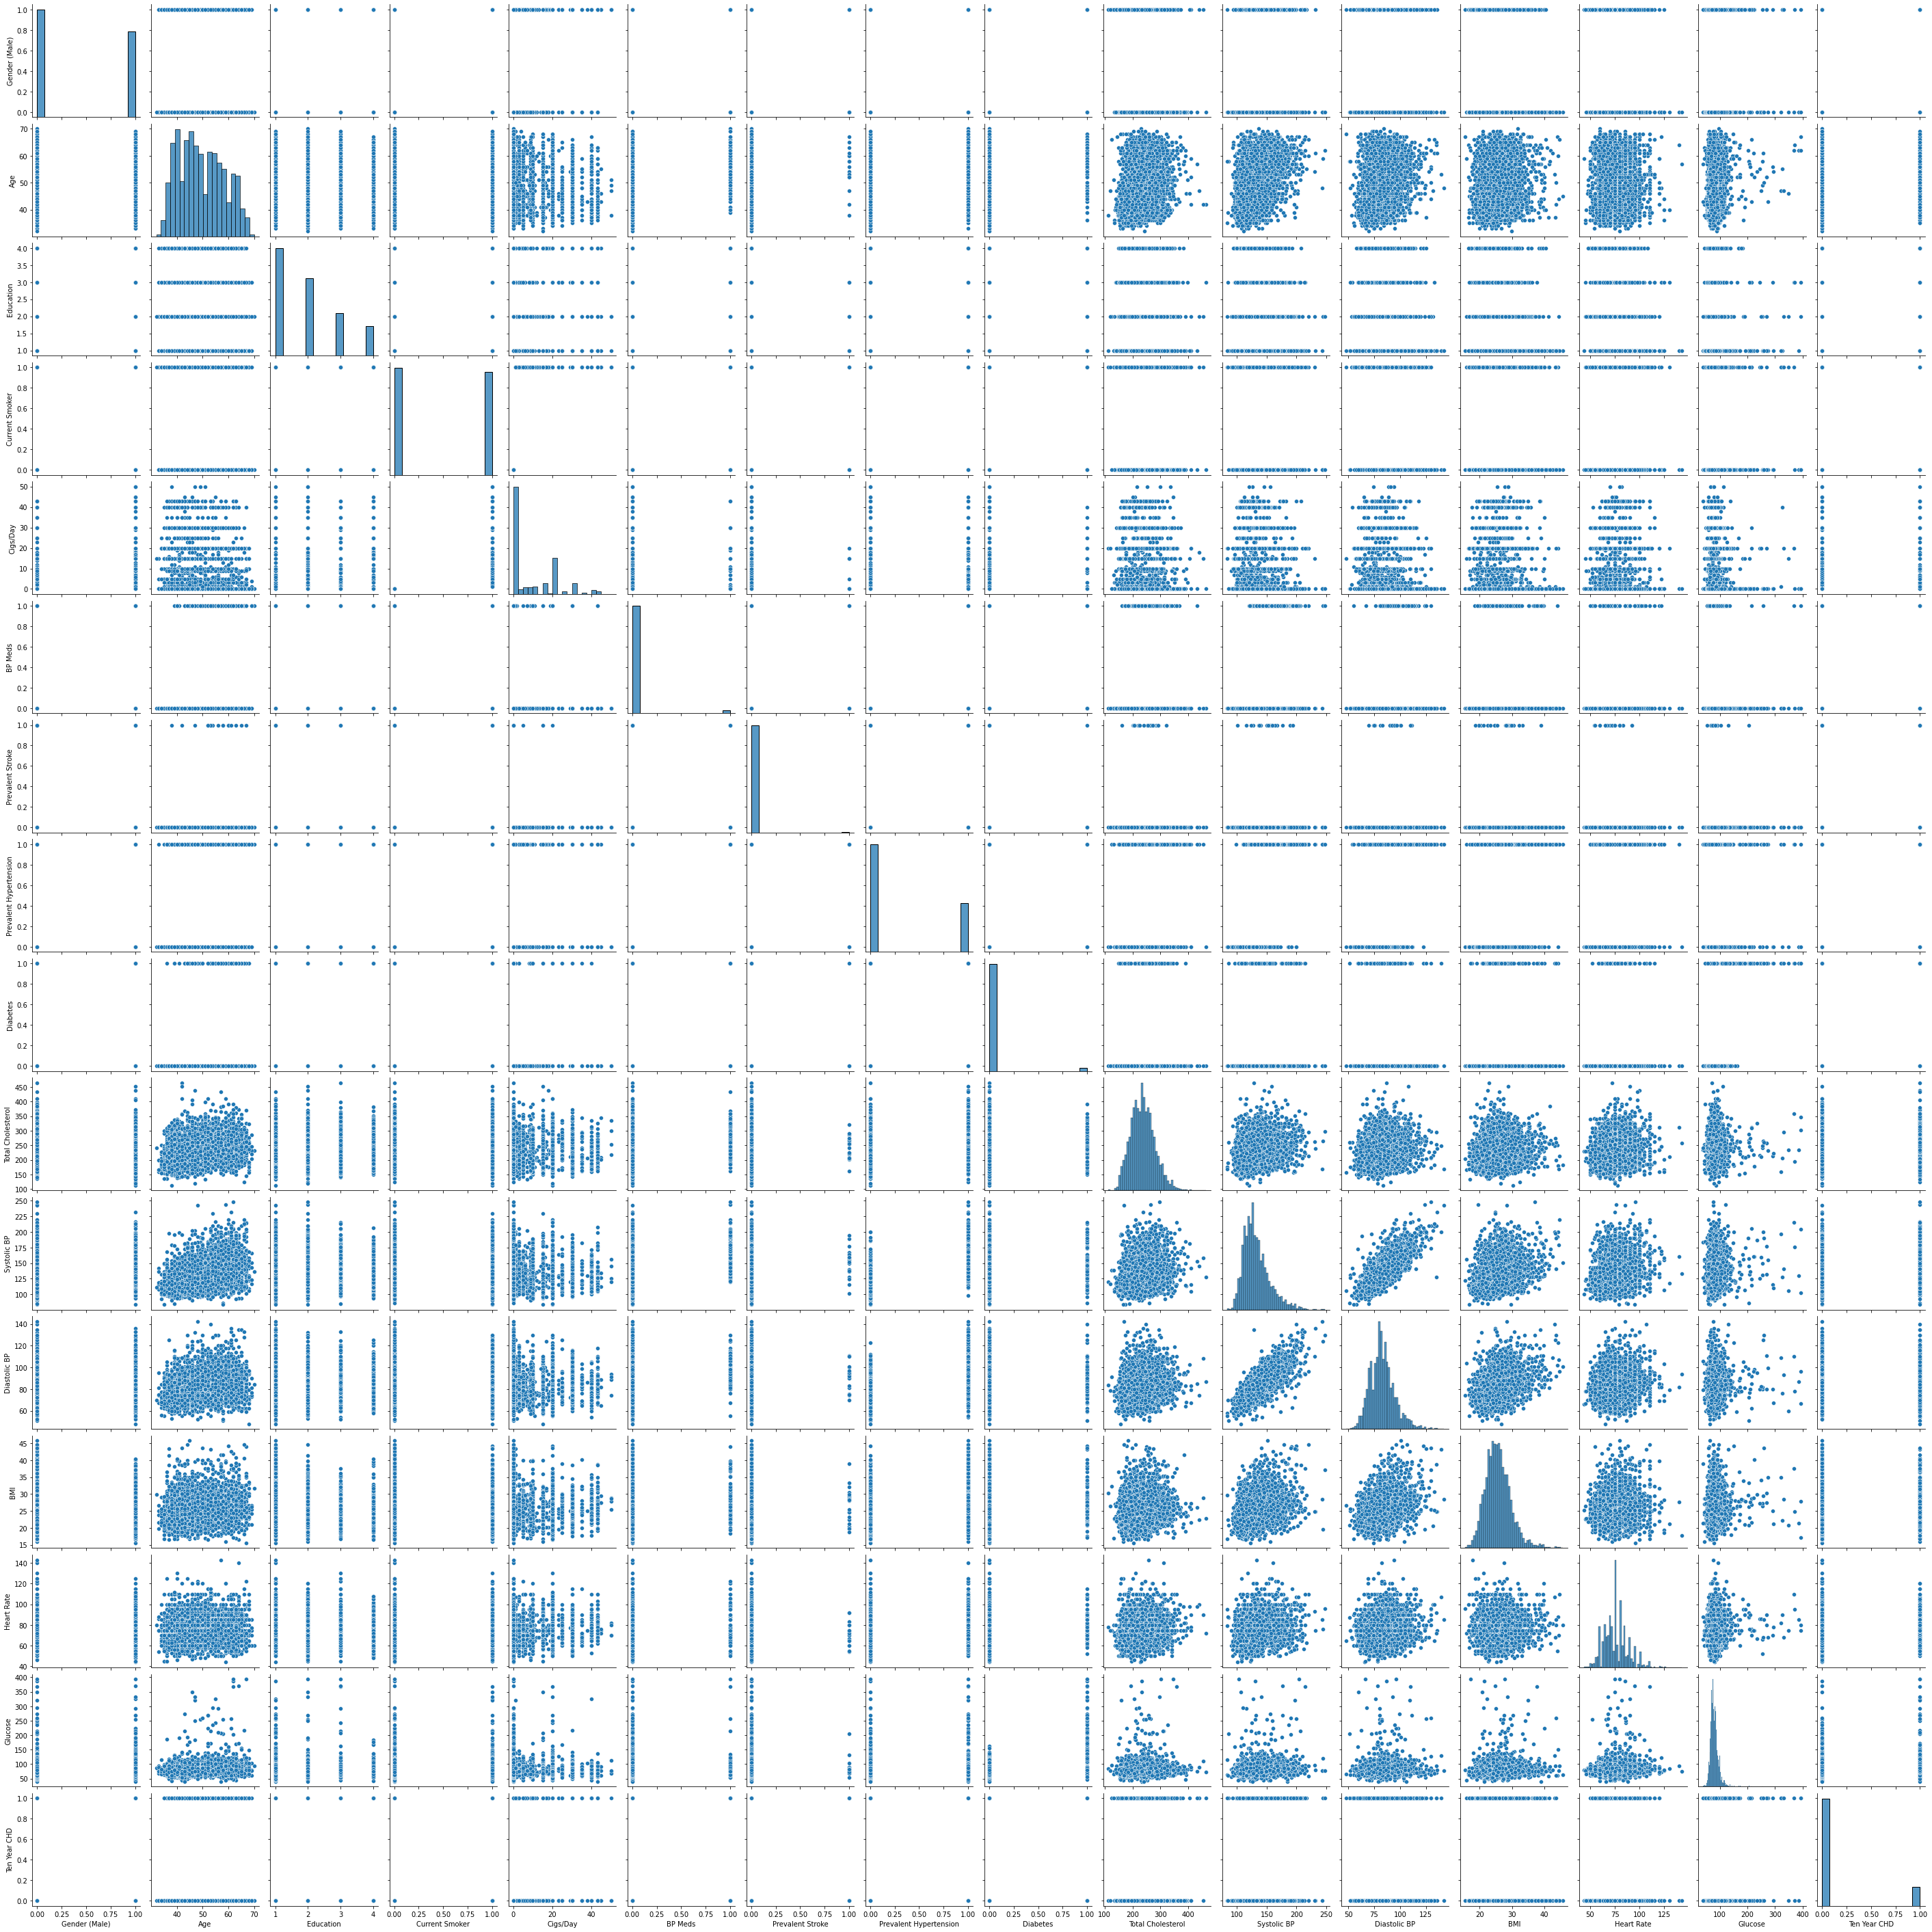

In [44]:
sn.pairplot(data=df)


# From all the graphs above

It is certain that the column "Education"

Does not affect the person's Heart Disease Rate. 

Its effect is negligible.

Hence, we drop the "Education" column from our Dataframe

In [45]:
df = df.drop("Education", axis=1)

In [46]:
df.head(10)

,Gender (Male),Age,Current Smoker,Cigs/Day,BP Meds,Prevalent Stroke,Prevalent Hypertension,Diabetes,Total Cholesterol,Systolic BP,Diastolic BP,BMI,Heart Rate,Glucose,Ten Year CHD
1,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
2,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
3,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
5,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
6,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
7,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
8,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
9,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
10,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# ML Modelling and Classification With Scores Conclusion

In [49]:
X = df.drop(['Ten Year CHD'], axis = 1)
y = df['Ten Year CHD']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model_RF = RandomForestClassifier(max_depth = 25, n_estimators = 100).fit(X_train, y_train)
model_SVM = svm.SVC().fit(X_train, y_train)
model_LR = LogisticRegression().fit(X_train, y_train)

print("The score of Test Data Set for Random Forest Classifier is ", model_RF.score(X_test, y_test))
print("The score of Train Data Set for Random Forest Classifier is",model_RF.score(X_train, y_train))


print("The score of Test Data Set for Support Vector Machine is   ",model_SVM.score(X_test, y_test))
print("The score of Train Data Set for Support Vector Machine is  ",model_SVM.score(X_train, y_train))


print("The score of Test Data Set for Linear Regression is        ",model_LR.score(X_test, y_test))
print("The score of Train Data Set for Linear Regression is       ",model_LR.score(X_train, y_train))

The score of Test Data Set for Random Forest Classifier is  0.842896174863388
The score of Train Data Set for Random Forest Classifier is 1.0
The score of Test Data Set for Support Vector Machine is    0.8456284153005464
The score of Train Data Set for Support Vector Machine is   0.8509911141490089
The score of Test Data Set for Linear Regression is         0.8510928961748634
The score of Train Data Set for Linear Regression is        0.8568010936431989


In [58]:
model_RF = RandomForestClassifier(max_depth = 25, n_estimators = 100).fit(X_train, y_train)
model_SVM = svm.SVC().fit(X_train, y_train)
model_LR = LogisticRegression().fit(X_train, y_train)

a = model_RF.predict(X_train)
b = model_SVM.predict(X_train)
c = model_LR.predict(X_train)

d = []
for i in range(len(a)):
    d.append([a[i], b[i], c[i]])
d = np.asarray(d)

model = LogisticRegression().fit(d, y_train)
model.score(d, y_train)

1.0

In [59]:
a = model_RF.predict(X_test)
b = model_SVM.predict(X_test)
c = model_LR.predict(X_test)

d = []
for i in range(len(a)):
    d.append([a[i], b[i], c[i]])
d = np.asarray(d)

print(model_RF.score(X_test, y_test))
print(model_SVM.score(X_test, y_test))
print(model_LR.score(X_test, y_test))
model.score(d, y_test)

0.8442622950819673
0.8456284153005464
0.8510928961748634


0.8442622950819673